### 공부시간에 따른 점수 예측하기
- 목표: 공부시간으로 점수 예측하기
- datasets: randomly value
- feature: 공부시간(time)
- label: 점수(jumsu)
- learning method: supervised learning, regress
- learning algorithm: linear regress
    - 조건: 데이터들이 선형분포를 가지고 있어야함

In [1]:
import pandas as pd

In [2]:
# randomly preparation datasets

jumsu = [x for x in range(7, 100, 7)]
time = [[x] for x in range(1, 15)]

In [3]:
time

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14]]

In [4]:
time_df = pd.DataFrame(time, columns=['Hour'])

In [5]:
time_df.head()

,Hour
0,1
1,2
2,3
3,4
4,5


In [6]:
jumsu_sr = pd.Series(jumsu)

In [7]:
jumsu_sr.head()

0     7
1    14
2    21
3    28
4    35
dtype: int64

In [8]:
# visualization
from matplotlib import pyplot as plt

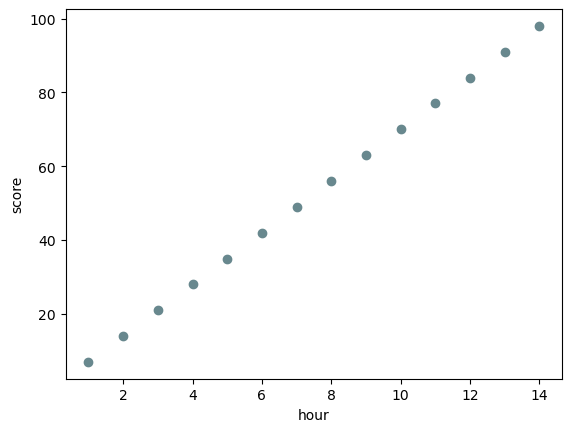

In [12]:
plt.plot(time_df, jumsu_sr, linestyle='', color='#68888E', marker='o')

plt.xlabel('hour')
plt.ylabel('score')

plt.show()

In [13]:
# learnming
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(time_df, jumsu_sr)    # find w & b

LinearRegression()

In [26]:
# after learning
gradient = model.coef_[0]
bias = model.intercept_

print(f"gradient: {model.coef_[0]}, bias: {model.intercept_}")

gradient: 7.000000000000001, bias: -7.105427357601002e-15


In [31]:
# prediction
pred_jumsu = gradient * time_df + bias
pred_jumsu = pred_jumsu.values.reshape(-1)

In [35]:
# 실제 점수와 예측 점수 차이 확인
jumsu = jumsu_sr - pred_jumsu
jumsu

0     6.217249e-15
1     5.329071e-15
2     3.552714e-15
3     3.552714e-15
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
12    0.000000e+00
13    0.000000e+00
dtype: float64

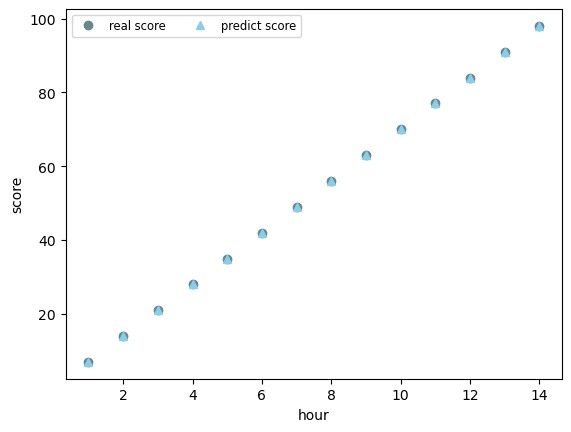

In [38]:
plt.plot(time_df, jumsu_sr, linestyle='', color='#68888E', marker='o', label='real score')
plt.plot(time_df, pred_jumsu, linestyle='', marker='^', color='skyblue', label='predict score')

plt.xlabel('hour')
plt.ylabel('score')
plt.legend(loc='upper left', ncol=2, fontsize='small')

plt.show()

In [40]:
# 모델 성능 평가
model.score(time_df, jumsu_sr)

1.0

In [45]:
hour_df = pd.DataFrame([[0], [3]], columns=['Hour'])

In [49]:
model.predict(hour_df)

array([-7.10542736e-15,  2.10000000e+01])

In [51]:
# 오차값 계산 즉, MAE, MSE, RMSE, R**2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
pred_y = model.predict(time_df)

In [54]:
mae = mean_absolute_error(jumsu_sr, pred_y)
mse = mean_squared_error(jumsu_sr, pred_y)
rmse = mean_squared_error(jumsu_sr, pred_y, squared=False)
r_2 = r2_score(jumsu_sr, pred_y)

In [55]:
print(f"mae: {mae}")
print(f"mse: {mse}")
print(f"rmse: {rmse}")
print(f"R2 score: {r_2}")

mae: 1.3322676295501878e-15
mse: 6.592623279347028e-30
rmse: 2.567610422035833e-15
R2 score: 1.0
